In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import math

In [2]:
np.random.seed(6)

population_ages1 = stats.poisson.rvs(loc=18, mu=35, size=150000)
population_ages2 = stats.poisson.rvs(loc=18, mu=10, size=100000)
population_ages = np.concatenate((population_ages1, population_ages2))

minnesota_ages1 = stats.poisson.rvs(loc=18, mu=30, size=30)
minnesota_ages2 = stats.poisson.rvs(loc=18, mu=10, size=20)
minnesota_ages = np.concatenate((minnesota_ages1, minnesota_ages2))

print( population_ages.mean() )
print( minnesota_ages.mean() )

43.000112
39.26


In [3]:
# Sample data , # pop mean
stats.ttest_1samp(a= minnesota_ages, popmean= population_ages.mean())

Ttest_1sampResult(statistic=-2.5742714883655027, pvalue=0.013118685425061678)

In [4]:
# Quantile to check  # Degrees of freedom
stats.t.ppf(q=0.025, df=49)

-2.0095752344892093

In [5]:
 # Quantile to check # Degrees of freedom
stats.t.ppf(q=0.975, df=49)  

2.009575234489209

In [6]:
# T-test statistic # Mupltiply by two for two tailed test*
stats.t.cdf(x= -2.5742, df= 49) * 2   

0.013121066545690117

In [7]:
sigma = minnesota_ages.std()/math.sqrt(50)  # Sample stdev/sample size

stats.t.interval(0.95,                        # Confidence level
                 df = 49,                     # Degrees of freedom
                 loc = minnesota_ages.mean(), # Sample mean
                 scale= sigma)   

(36.369669080722176, 42.15033091927782)

In [8]:
# Two sample test

In [9]:
np.random.seed(12)
wisconsin_ages1 = stats.poisson.rvs(loc=18, mu=33, size=30)
wisconsin_ages2 = stats.poisson.rvs(loc=18, mu=13, size=20)
wisconsin_ages = np.concatenate((wisconsin_ages1, wisconsin_ages2))

print( wisconsin_ages.mean() )

42.8


In [10]:
stats.ttest_ind(a= minnesota_ages,
                b= wisconsin_ages,
                equal_var=False)    # Assume samples have equal variance?

Ttest_indResult(statistic=-1.7083870793286842, pvalue=0.09073104343957748)

In [11]:
# Note: The null hypothesis in two sample test assumens two froups are the from same ift
# since p-val is 0.09 which is greater than 0.05. We fail to reject to null hypotesis. Which mean
# is both group may come from same population.

In [12]:
np.random.seed(11)

before= stats.norm.rvs(scale=30, loc=250, size=100)
after = before + stats.norm.rvs(scale=5, loc=-1.25, size=100)
weight_df = pd.DataFrame({"weight_before":before,
                          "weight_after":after,
                          "weight_change":after-before})

weight_df.describe()             # Check a summary of the data

,weight_before,weight_after,weight_change
count,100.000000,100.000000,100.000000
mean,250.345546,249.115171,-1.230375
std,28.132539,28.422183,4.783696
min,170.400443,165.913930,-11.495286
25%,230.421042,229.148236,-4.046211
50%,250.830805,251.134089,-1.413463
75%,270.637145,268.927258,1.738673
max,314.700233,316.720357,9.759282


In [13]:
stats.ttest_rel(a = before, b = after)

Ttest_relResult(statistic=2.5720175998568284, pvalue=0.011596444318439857)

Since the p-val is 0.01 which is less than 0.05 threashold. We can say that the treatment has an
effect. Thus we rejec the null hypothesis that the threatment does not have effect. 

p-val also mean the chances of seeing this large of difference between samples due to chance is 
jut over 1%. Thus, it is less like to be by chance.

Text(0, 0.02, 'Type 2 Error')

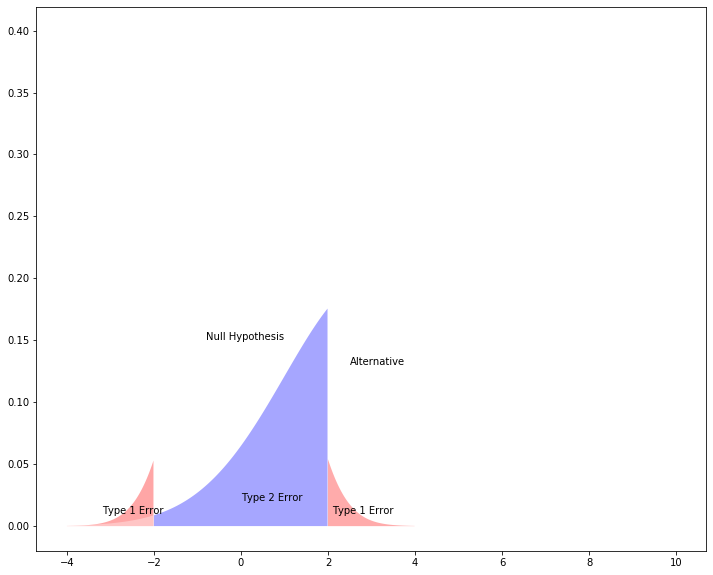

In [15]:
plt.figure(figsize=(12,10))

plt.fill_between(x=np.arange(-4,-2,0.01), 
                 y1= stats.norm.pdf(np.arange(-4,-2,0.01)) ,
                 facecolor='red',
                 alpha=0.35)

plt.fill_between(x=np.arange(-2,2,0.01), 
                 y1= stats.norm.pdf(np.arange(-2,2,0.01)) ,
                 facecolor='white',
                 alpha=0.35)

plt.fill_between(x=np.arange(2,4,0.01), 
                 y1= stats.norm.pdf(np.arange(2,4,0.01)) ,
                 facecolor='red',
                 alpha=0.5)

plt.fill_between(x=np.arange(-4,-2,0.01), 
                 y1= stats.norm.pdf(np.arange(-4,-2,0.01),loc=3, scale=2) ,
                 facecolor='white',
                 alpha=0.35)

plt.fill_between(x=np.arange(-2,2,0.01), 
                 y1= stats.norm.pdf(np.arange(-2,2,0.01),loc=3, scale=2) ,
                 facecolor='blue',
                 alpha=0.35)

plt.fill_between(x=np.arange(2,10,0.01), 
                 y1= stats.norm.pdf(np.arange(2,10,0.01),loc=3, scale=2),
                 facecolor='white',
                 alpha=0.35)

plt.text(x=-0.8, y=0.15, s= "Null Hypothesis")
plt.text(x=2.5, y=0.13, s= "Alternative")
plt.text(x=2.1, y=0.01, s= "Type 1 Error")
plt.text(x=-3.2, y=0.01, s= "Type 1 Error")
plt.text(x=0, y=0.02, s= "Type 2 Error")

In [16]:
lower_quantile = stats.norm.ppf(0.025)  # Lower cutoff value
upper_quantile = stats.norm.ppf(0.975)  # Upper cutoff value

# Area under alternative, to the left the lower cutoff value
low = stats.norm.cdf(lower_quantile,    
                     loc=3,             
                     scale=2)

# Area under alternative, to the left the upper cutoff value
high = stats.norm.cdf(upper_quantile, 
                      loc=3, 
                      scale=2)          

# Area under the alternative, between the cutoffs (Type II error)
high-low

0.294956061112323